<img src="../../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

## Quantum Entanglement and Teleportation

In [1]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, IBMQ, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

## Introduction

In [entanglement](#entanglement), we will introduce you to the quantum concept of entanglement, in particular, the maximally entangled quantum state $|\psi\rangle = (|00\rangle + |11\rangle)$, we will then entangle qubits on a real device. 

Next, we will explore how a Bell state can be used to a teleport a quantum statement using quantum [Teleportation](#teleportation), where a qubit state is transmitted using two classical bits.

## Entanglement<a id='entanglement'></a>

The core idea behind the second Principle is *entanglement*. Upon reading the Principle, one might be inclined to think that entanglement is simply strong correlation between two entitities -- but entanglement goes well beyond mere perfect (classical) correlation. If you and I read the same paper, we will have learned the same information. If a third person comes along and reads the same paper they <i>also</i> will have learned this information. All three persons in this case are perfectly correlated, and they will remain correlated even if they are separated from each other. 

The situation with quantum entanglement is a bit more subtle. In the quantum world, you and I could read the same quantum paper, and yet we will not learn what information is actually contained in the paper until we get together and share our information. However, when we are together, we find that we can unlock more information from the paper than we initially thought possible. Thus, quantum entanglement goes much further than perfect correlation.

To demonstrate this, we will define the controlled-NOT (CNOT) gate and the composition of two systems. The convention we use Qiskit is to label states by writing the first qubit's name in the rightmost position, thereby allowing us to easily convert from binary to decimal. As a result, we define the tensor product between operators $q_0$ and $q_1$ by $q_1\otimes q_0$. 

Taking $q_0$ as the control and $q_1$ as the target, the CNOT with this representation is given by

$$ CNOT =\begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\0& 0& 1 & 0\\0 & 1 & 0 & 0 \end{pmatrix},$$

which is non-standard in the quantum community, but more easily connects to classical computing, where the least significant bit (LSB) is typically on the right. An entangled state of the two qubits can be made via an $H$ gate on the control qubit, followed by the CNOT gate. This generates a particular maximally entangled two-qubit state known as a Bell state, named after John Stewart Bell ([learn more about Bell and his contributions to quantum physics and entanglement](https://en.wikipedia.org/wiki/John_Stewart_Bell)). 


To explore this, we can prepare an entangled state of two qubits, and then ask questions about the qubit states. The questions we can ask are:
* What is the state of the first qubit in the standard basis?
* What is the state of the first qubit in the superposition basis?
* What is the state of the second qubit in the standard basis?
* What is the state of the second qubit in the superposition basis?
* What is the state of both qubits in the standard basis?
* what is the state of both qubits in the superposition basis?

Below is a program with six such circuits for these six questions.

In [3]:
# Creating registers
q2 = QuantumRegister(2)
c1 = ClassicalRegister(1)
c2 = ClassicalRegister(2)

# quantum circuit to make an entangled bell state 
bell = QuantumCircuit(q2)
bell.h(q2[0])
bell.cx(q2[0], q2[1])

# quantum circuit to measure q0 in the standard basis
measureIZ = QuantumCircuit(q2, c1)
measureIZ.measure(q2[0], c1[0])
bellIZ = bell+measureIZ

# quantum circuit to measure q0 in the superposition basis 
measureIX = QuantumCircuit(q2, c1)
measureIX.h(q2[0])
measureIX.measure(q2[0], c1[0])
bellIX = bell+measureIX

# quantum circuit to measure q1 in the standard basis
measureZI = QuantumCircuit(q2, c1)
measureZI.measure(q2[1], c1[0])
bellZI = bell+measureZI

# quantum circuit to measure q1 in the superposition basis 
measureXI = QuantumCircuit(q2, c1)
measureXI.h(q2[1])
measureXI.measure(q2[1], c1[0])
bellXI = bell+measureXI

# quantum circuit to measure q in the standard basis 
measureZZ = QuantumCircuit(q2, c2)
measureZZ.measure(q2[0], c2[0])
measureZZ.measure(q2[1], c2[1])
bellZZ = bell+measureZZ

# quantum circuit to measure q in the superposition basis 
measureXX = QuantumCircuit(q2, c2)
measureXX.h(q2[0])
measureXX.h(q2[1])
measureXX.measure(q2[0], c2[0])
measureXX.measure(q2[1], c2[1])
bellXX = bell+measureXX

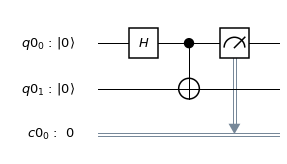

In [4]:
bellIZ.draw(output='mpl')

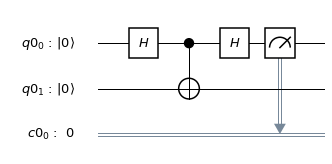

In [5]:
bellIX.draw(output='mpl')

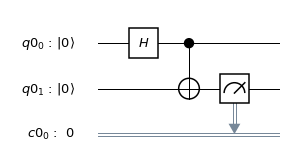

In [6]:
bellZI.draw(output='mpl')

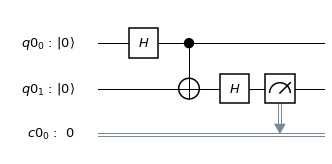

In [7]:
bellXI.draw(output='mpl')

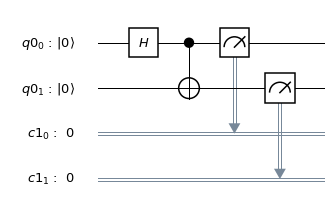

In [8]:
bellZZ.draw(output='mpl')

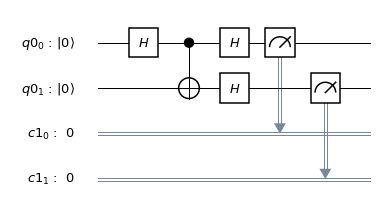

In [9]:
bellXX.draw(output='mpl')

Let's begin by running just the first two questions, looking at the results of the first qubit ($q_0$) using a computational and then a superposition measurement.

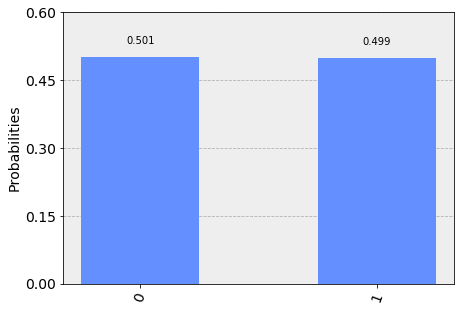

In [10]:
circuits = [bellIZ,bellIX,bellZI,bellXI,bellZZ,bellXX]
job = execute(circuits, backend)
result = job.result()

plot_histogram(result.get_counts(bellIZ))

In [11]:
result.get_counts(bellIZ)

{'0': 513, '1': 511}

We find that the result is random. Half the time $q_0$ is in  $|0\rangle$, and the other half it is in the $|1\rangle$ state. You may wonder whether this is like the superposition from earlier in the tutorial. Maybe the qubit has a perfectly definite state, and we are simply measuring in another basis.  What would you expect if you did the experiment and measured in the superposition basis? Recall we do this by adding an $H$ gate before the measurement...which is exactly what we have checked with the second question.

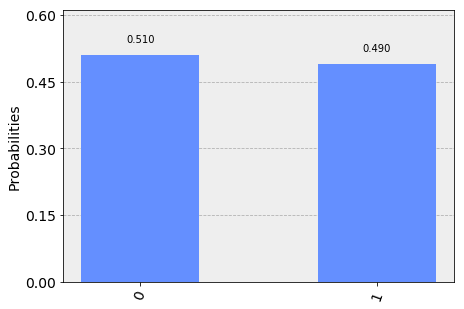

In [12]:
plot_histogram(result.get_counts(bellIX))

In this case, we see that the result is still random, regardless of whether we measure in the computational or the superposition basis. This tells us that we actually know nothing about the first qubit. What about the second qubit, $q_1$? The next lines will run experiments measuring the second qubit in both the computational and superposition bases.

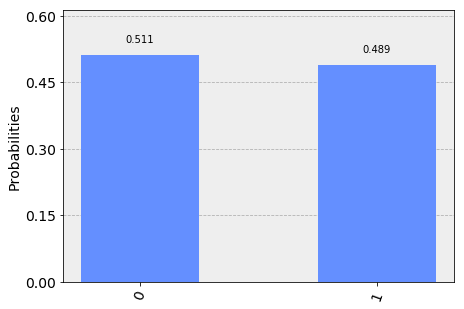

In [13]:
plot_histogram(result.get_counts(bellZI))

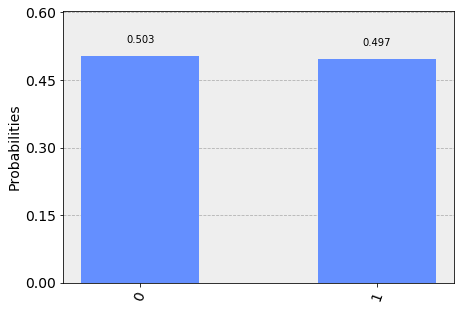

In [14]:
plot_histogram(result.get_counts(bellXI))

Once again, all the experiments give random outcomes. It seems we know nothing about either qubit in our system! In our previous analogy, this is equivalent to two readers separately reading a quantum paper and extracting no information whatsoever from it on their own.

What do you expect, however, when the readers get together?  Below we will measure both in the joint computational basis. 

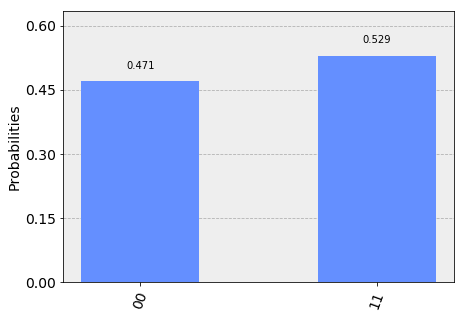

In [15]:
plot_histogram(result.get_counts(bellZZ))

Here we see that with high probability, if $q_0$ is in state 0, $q_1$ will be in 0 as well; the same goes if $q_0$ is in state 1. They are perfectly correlated.

What about if we measure both in the superposition basis?  

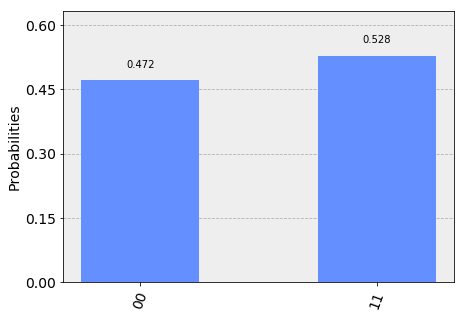

In [16]:
plot_histogram(result.get_counts(bellXX))

Here we see that the system **also** has perfect correlations (accounting for experimental noise). Therefore, if $q_0$ is measured in state $|0\rangle$, we know $q_1$ is in this state as well; likewise, if $q_0$ is measured in state $|+\rangle$, we know $q_1$ is also in this state. These correlations have led to much confusion in science, because any attempt to relate the unusual behavior of quantum entanglement to our everyday experiences is a fruitless endeavor. 

Finally, we need to point out that having correlated outcomes does not necessarily imply that what we are observing is an entangled state. What would we observe, for example, if we prepared half of our shots in the $|00\rangle$ state and half of the shots in the $|11\rangle$ state? Let's have a look

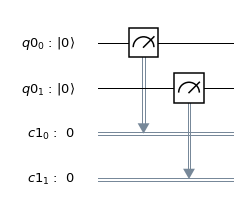

In [17]:
# quantum circuit to make a mixed state 
mixed1 = QuantumCircuit(q2, c2)
mixed2 = QuantumCircuit(q2, c2)
mixed2.x(q2)
mixed1.measure(q2[0], c2[0])
mixed1.measure(q2[1], c2[1])
mixed2.measure(q2[0], c2[0])
mixed2.measure(q2[1], c2[1])

mixed1.draw(output='mpl')

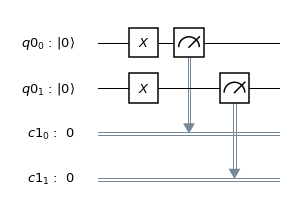

In [18]:
mixed2.draw(output='mpl')

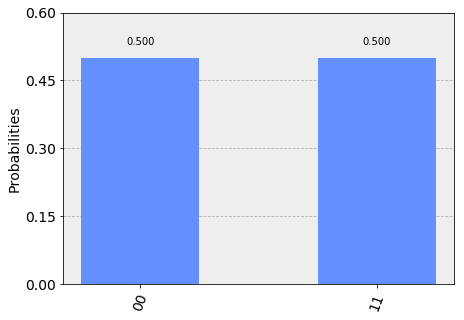

In [19]:
mixed_state = [mixed1,mixed2]
job = execute(mixed_state, backend)
result = job.result()

counts1 = result.get_counts(mixed_state[0])
counts2 = result.get_counts(mixed_state[1])

from collections import Counter
ground = Counter(counts1)
excited = Counter(counts2)
plot_histogram(ground+excited)

We do see the same kind of correlation indeed as we observed in the "bell_measureZZ" circuit. But we know this is not an entangled state! All we have done is leave the qubits in their ground state for some of the shots and flip both qubits for some of the shots. This is called a mixed state and it is a classical state. Now, would we observe a similar outcome if we measured this mixed state in the superposition basis? We will leave this for the reader to try.

This is just a taste of what happens in the quantum world with multi-qubit states. Please continue to [Testing Entanglement](entanglement_testing.ipynb) to explore further!

## _Quantum Teleportation_<a id='teleportation'></a>

Quantum teleportation is a protocol to transmit quantum states from one location to another, assisted by a previously shared entangled state and a classical communication channel. It was devised by Charles H. Bennett (IBM), Gilles Brassard, Claude Cr√©peau, Richard Jozsa, Asher Peres, and William K. Wootters in [1993](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.70.1895). It was first demonstrated with photons in [1997](http://www.nature.com/nature/journal/v390/n6660/abs/390575a0.html), and has since been realised in [atoms](http://www.nature.com/nphys/journal/v9/n7/abs/nphys2631.html), [ions](http://www.nature.com/nature/journal/v429/n6993/full/nature02570.html, http://www.nature.com/nature/journal/v429/n6993/full/nature02608.html), [electrons](http://science.sciencemag.org/content/345/6196/532) and [superconducting circuits](http://www.nature.com/nature/journal/v500/n7462/full/nature12422.html). The [record](http://www.nature.com/nature/journal/v489/n7415/full/nature11472.html) distance for quantum teleportation is 143 km via satellite, set in 2012.

<img src="../images/teleportation.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">

As illustrated above, the protocol starts out with a shared entangled state between the sender (Alice) and the receiver (Bob):
$$|\psi\rangle_{AB} = \frac{1}{\sqrt{2}}(|0\rangle_A \otimes |0\rangle_B + |1\rangle_A \otimes |1\rangle_B)$$
The first qubit, denoted by subscript $A$, belongs to Alice, and the second qubit, $B$, belongs to Bob.

Alice has a quantum state that she wants to convey to Bob:
$$|\psi\rangle_{C} = \alpha|0\rangle_C + \beta|1\rangle_C$$

At this point, Alice has two quantum states ($C$, the one she wants to teleport, and $A$, one of the entangled pair), and Bob has one quantum state. The total state of the system is given by:
$$|\psi\rangle_{AB} \otimes |\psi\rangle_C = \frac{1}{\sqrt{2}}(|0\rangle_A \otimes |0\rangle_B + |1\rangle_A \otimes |1\rangle_B) \otimes (\alpha|0_C\rangle + \beta|1_C\rangle)$$
or, in the Bell basis:
$$|\psi\rangle_{AB} \otimes |\psi\rangle_C = \frac{1}{2}[
|\Phi^+\rangle_{AC}\otimes(\alpha|0\rangle_B + \beta|1\rangle_B) + 
|\Phi^-\rangle_{AC}\otimes(\alpha|0\rangle_B - \beta|1\rangle_B) + \\
|\Psi^+\rangle_{AC}\otimes(\alpha|0\rangle_B + \beta|1\rangle_B) + 
|\Psi^-\rangle_{AC}\otimes(\alpha|0\rangle_B - \beta|1\rangle_B) ]$$
where:
$$|0\rangle \otimes |0\rangle = \frac{1}{\sqrt{2}}(|\Phi^+\rangle + |\Phi^-\rangle), 
|0\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}}(|\Psi^+\rangle + |\Psi^-\rangle)\\
|1\rangle \otimes |0\rangle = \frac{1}{\sqrt{2}}(|\Psi^+\rangle - |\Psi^-\rangle), 
|1\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}}(|\Phi^+\rangle - |\Phi^-\rangle).$$

Alice now measures her two quantum states, $A$ and $C$, in the Bell basis. This will collapse the three state system into the one of the following four states with equal probability, with the corresponding measurement outcomes:
- **00**: $|\Phi^+\rangle_{AC}\otimes(\alpha|0\rangle_B + \beta|1\rangle_B)$
- **01**: $|\Phi^-\rangle_{AC}\otimes(\alpha|0\rangle_B - \beta|1\rangle_B)$
- **10**: $|\Psi^+\rangle_{AC}\otimes(\alpha|1\rangle_B + \beta|0\rangle_B)$ 
- **11**: $|\Psi^-\rangle_{AC}\otimes(-\alpha|1\rangle_B + \beta|0\rangle_B)$

Alice now sends the results of her measurements to Bob. Using this information, he performs one of the following transformations on his quantum state to transform it to the desired state $\alpha|0\rangle_B - \beta|1\rangle_B$:
- If he receives **00**, he applies $I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$
- If he receives **01**, he applies $Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$
- If he receives **10**, he applies $X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$ 
- If he receives **11**, he applies $XZ = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}$ 

Transmission (teleportation) of $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ is thus achieved. 

Recall from [entanglement](entanglement_introduction.ipynb) that the steps to make the shared entangled state $|\psi\rangle = \frac{1}{\sqrt{2}}(|0_A 0_B\rangle + |1_A 1_B\rangle)$ are:
1. Start with an initial state $|0_A 0_B\rangle$
2. Apply $H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$ on $q_A$ 
3. Then a $CNOT = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\0& 0& 1 & 0\\0 & 1 & 0 & 0 \end{pmatrix}$ from $q_A$ to $q_B$

With $q_A = q_1$ and $q_B = q_2$, this looks like:

In [2]:
# Creating registers
tq = QuantumRegister(3)
tc0 = ClassicalRegister(1)
tc1 = ClassicalRegister(1)
tc2 = ClassicalRegister(1)

# Quantum circuit to make the shared entangled state 
teleport = QuantumCircuit(tq, tc0,tc1,tc2)
teleport.h(tq[1])
teleport.cx(tq[1], tq[2])

Alice then prepares her quantum state to be teleported, $|\psi\rangle_{C} = \alpha|0\rangle_C + \beta|1\rangle_C$. In this experiment, $\alpha = \cos(\frac{\theta}{2})$ and $\beta = \sin(\frac{\theta}{2})$ where $\theta = \frac{\pi}{4}$. This state can be created by applying a rotation around the y axis:
$R_y(\theta)$ on $q_C$

With $q_C = q_0$, this looks like:

In [3]:
teleport.ry(np.pi/4,tq[0])

Alice now applies $CNOT$ to her two quantum states $q_A(q_1)$ and $q_C(q_0)$, followed by an $H$, to entangle them and project them into the Bell basis:

In [4]:
teleport.cx(tq[0], tq[1])
teleport.h(tq[0])
teleport.barrier()

She now measures her two quantum states $q_A(q_1)$ and $q_C(q_0)$:

In [5]:
teleport.measure(tq[0], tc0[0])
teleport.measure(tq[1], tc1[0])

Depending on the results of these measurements, Bob has to apply an $X$ or $Z$, or both, to his quantum state $q_B(q_2)$:

In [6]:
teleport.z(tq[2]).c_if(tc0, 1)
teleport.x(tq[2]).c_if(tc1, 1)

His state is now the same as the state Alice prepared earlier, which can be verified by measurement:

In [7]:
teleport.measure(tq[2], tc2[0])

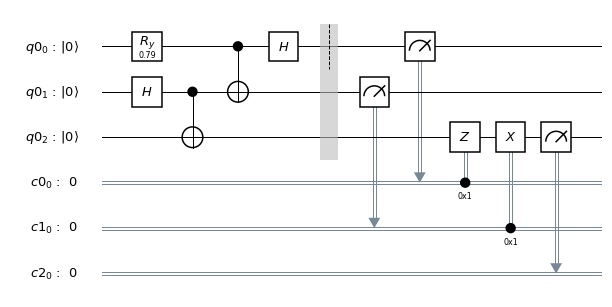

In [8]:
teleport.draw(output='mpl')

Let's now create and execute the quantum circuits and plot the results:

In [9]:
local_backend = BasicAer.get_backend('qasm_simulator') # note that this circuit can not be run on an IBM Q device
teleport_job = execute(teleport, local_backend) 
teleport_result = teleport_job.result()

We must manipulate the data to understand the results better, first only plotting the results of Alice's measurement:  

Note each classical register is seperated by a space, and the order is c2 c1 c0.

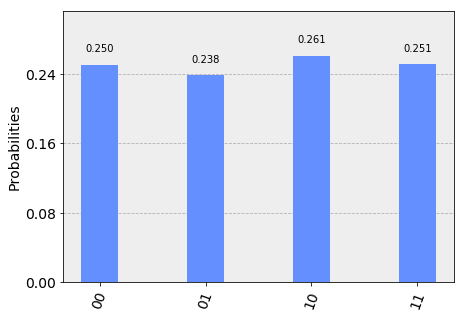

In [10]:
data = teleport_result.get_counts(teleport)
alice = {}
alice['00'] = data['0 0 0'] + data['1 0 0']
alice['10'] = data['0 1 0'] + data['1 1 0']
alice['01'] = data['0 0 1'] + data['1 0 1']
alice['11'] = data['0 1 1'] + data['1 1 1']
plot_histogram(alice)

As expected, the probabilities are roughly equal.  

Now, manipulate the data to plot the result of Bob's measurement:

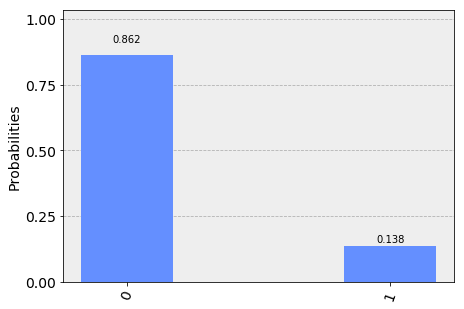

In [11]:
bob = {}
bob['0'] = data['0 0 0'] + data['0 1 0'] +  data['0 0 1'] + data['0 1 1']
bob['1'] = data['1 0 0'] + data['1 1 0'] +  data['1 0 1'] + data['1 1 1']
plot_histogram(bob)

As expected, $|\alpha|^2 = |\cos(\frac{\pi}{8})|^2 \approx 0.854$ (the probability of measuring 0) and $|\beta|^2 = |\sin(\frac{\pi}{8})|^2 \approx 0.146$ (the probability of measuring 1). Why don't you try teleporting a different quantum state now?

## _Quantum Superdense Coding_<a id='superdensecoding'></a>

Quantum superdense coding is the dual protocol of quantum teleportation, whereby two classical bits of information are transmitted using only one qubit and a previously shared entangled state. It was devised by Charles Bennett (IBM) and Stephen Wiesner in [1992](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.69.2881). 

<img src="../images/superdensecoding.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">

As illustrated above, and as in quantum teleportation, the protocol starts out with a shared entangled state between the sender (Alice) and the receiver (Bob):
$$|\psi\rangle_{AB} = \frac{1}{\sqrt{2}}(|0\rangle_A \otimes |0\rangle_B + |1\rangle_A \otimes |1\rangle_B)$$
The first qubit, denoted by subscript $A$, belongs to Alice, and the second qubit, $B$, belongs to Bob.

Alice wants to send a two bit message to Bob, 00, 01, 10, or 11.  She performs a single qubit operation on her qubit which transforms the entangled state according to which message she wants to send:
- For a message of **00**: Alice applies $I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$. The resultant state would be $|\psi_{00}\rangle = \frac{1}{\sqrt{2}}(|0_A 0_B\rangle + |1_A 1_B\rangle)$
- For a message of **01**: Alice applies $X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$. The resultant state would be $|\psi_{01}\rangle = \frac{1}{\sqrt{2}}(|1_A 0_B\rangle + |0_A 1_B\rangle)$  
- For a message of **10**: Alice applies $Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$. The resultant state would be $|\psi_{10}\rangle = \frac{1}{\sqrt{2}}(|0_A 0_B\rangle - |1_A 1_B\rangle)$ 
- For a message of **11**: Alice applies $XZ = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}$. The resultant state would be $|\psi_{11}\rangle = \frac{1}{\sqrt{2}}(- |1_A 0_B\rangle + |0_A 1_B\rangle $

The key to superdense coding is that these four states, $|\psi_{00}\rangle, |\psi_{01}\rangle, |\psi_{10}\rangle, |\psi_{11}\rangle$ (otherwise known as the [Bell states](https://en.wikipedia.org/wiki/Bell_state)), are orthonormal and are hence distinguishable by a quantum measurement.

In [12]:
# Creating registers
sdq = QuantumRegister(2)
sdc = ClassicalRegister(2)

# Quantum circuit to make the shared entangled state 
superdense = QuantumCircuit(sdq, sdc)
superdense.h(sdq[0])
superdense.cx(sdq[0], sdq[1])

Alice now needs to decide what two bit message she wants to transmit to Bob, ($00$, $01$, $10$, or $11$), and perform the corresponding to transformation ($I$, $X$, $Z$ or $XZ$ respectively) to her qubit $q_A$ ($q_0$). In this case, she encodes $11$:

In [13]:
# For 00, do nothing

# For 01, apply $X$
#shared.x(q[0])

# For 01, apply $Z$
#shared.z(q[0])

# For 11, apply $XZ$
superdense.z(sdq[0]) 
superdense.x(sdq[0])
superdense.barrier()

Bob now needs to 'decode' the message that Alice sent him. Since measurement in Qiskit is only possible in the standard computational basis, he does this by:
1. Applying a $CNOT$ from $q_A$ to $q_B$
2. Then a $H$ on $q_A$ 
3. And measuring $q_A$ and $q_B$

Recalling that $q_A = q_0$ and $q_B = q_1$, this looks like:

In [14]:
superdense.cx(sdq[0], sdq[1])
superdense.h(sdq[0])
superdense.measure(sdq[0], sdc[0])
superdense.measure(sdq[1], sdc[1])

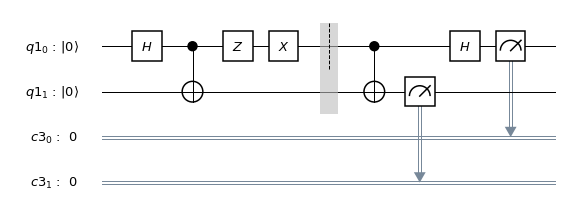

In [15]:
superdense.draw(output='mpl')

Let's now create, execute the quantum circuits, and plot the results:

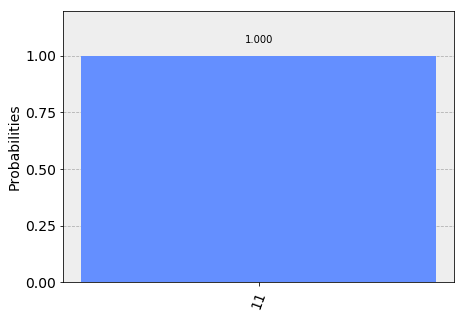

In [16]:
backend = BasicAer.get_backend('qasm_simulator') # run on local simulator by default 

# Uncomment the following lines to run on a real device
# IBMQ.load_accounts()
# from qiskit.backends.ibmq import least_busy
# backend = least_busy(IBMQ.backends(operational=True, simulator=False))
# print("the best backend is " + backend.name())

superdense_job = execute(superdense, backend)
superdense_result = superdense_job.result()

plot_histogram(superdense_result.get_counts(superdense))

The state with the highest probability should match the message that Alice encoded earlier ($11$). Mathematically:
- For a message of **00**: Bob received $|\psi_{00}\rangle = \frac{1}{\sqrt{2}}(|0_A 0_B\rangle + |1_A 1_B\rangle)$. Applying $CNOT$ gives: $\frac{1}{\sqrt{2}}(|0_A 0_B\rangle + |1_A 0_B\rangle)$. Applying $H$ on $q_A$ results in: $\frac{1}{\sqrt{2}}\frac{1}{\sqrt{2}}[(|0_A\rangle + |1_A\rangle)|0_B\rangle + (|0_A\rangle - |1_A\rangle)|0_B\rangle] = |0_A 0_B\rangle$ 
- For a message of **01**: Bob received $|\psi_{01}\rangle = \frac{1}{\sqrt{2}}(|1_A 0_B\rangle + |0_A 1_B\rangle)$. Applying $CNOT$ gives: $\frac{1}{\sqrt{2}}(|0_A 1_B\rangle)+ |1_A 1_B\rangle$. Applying $H$ on $q_A$ results in: $\frac{1}{\sqrt{2}}\frac{1}{\sqrt{2}}[(|0_A\rangle + |1_A\rangle)|1_B\rangle + (|0_A\rangle - |1_A\rangle)|1_B\rangle + (|0_A\rangle + |1_A\rangle)|1_B\rangle] = |0_A 1_B\rangle$ 
- For a message of **10**: Bob received $|\psi_{10}\rangle = \frac{1}{\sqrt{2}}(|0_A 0_B\rangle - |1_A 1_B\rangle)$. Applying $CNOT$ gives: $\frac{1}{\sqrt{2}}(|0_A 0_B\rangle - |1_A 0_B\rangle)$. Applying $H$ on $q_A$ results in: $\frac{1}{\sqrt{2}}\frac{1}{\sqrt{2}}[(|0_A\rangle + |1_A\rangle)|0_B\rangle - (|0_A\rangle - |1_A\rangle)|0_B\rangle] = |1_A 0_B\rangle$ 
- For a message of **11**: Bob received $|\psi_{11}\rangle = \frac{1}{\sqrt{2}}(- |1_A 0_B\rangle + |0_A 1_B\rangle $. Applying $CNOT$ gives: $\frac{1}{\sqrt{2}}(|0_A 1_B\rangle - |1_A 1_B\rangle)$. Applying $H$ on $q_A$ results in: $\frac{1}{\sqrt{2}}\frac{1}{\sqrt{2}}[(|0_A\rangle + |1_A\rangle)|1_B\rangle - (|0_A\rangle - |1_A\rangle)|1_B\rangle] = |1_A 1_B\rangle$ 